# Importing the libraries and reading the data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv('profiles.csv')


# Doing a basic exploratory data analysis

In [2]:
print(df.head())
df.describe()

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


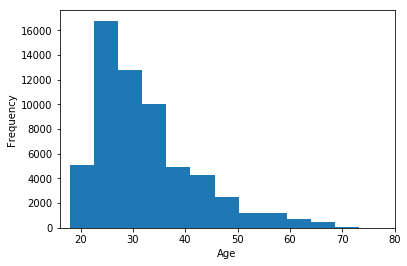

In [3]:
#Generating a histogram for age
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

In [4]:
#finding the number of rows and columns
print(df.shape)

(59946, 31)


# Cleaning the data

In [5]:
# drop columns that will not be used for this project
columns_to_drop = [
    'education',
    'ethnicity',
    'job',
    'last_online',
    'location',
    'offspring',
    'orientation',
    'pets',
    'religion',
    'sign',
    'speaks',
    'status',
    'income', 
    'essay0',
    'essay1',
    'essay2',
    'essay3',
    'essay4',
    'essay5',
    'essay6',
    'essay7',
    'essay8',
    'essay9',
    'sex'
]
df.drop(columns_to_drop, axis=1, inplace=True)
df.columns.values

array(['age', 'body_type', 'diet', 'drinks', 'drugs', 'height', 'smokes'],
      dtype=object)

In [6]:
#Checking if the remaining columns have any null values
df.isna().any()

age          False
body_type     True
diet          True
drinks        True
drugs         True
height        True
smokes        True
dtype: bool

In [7]:
#removing nulls in the remaining columns
remaining_columns_with_nan_values=['body_type','diet','drinks','drugs','height','smokes']
df.dropna(subset=remaining_columns_with_nan_values,inplace=True)
df.isna().any()

age          False
body_type    False
diet         False
drinks       False
drugs        False
height       False
smokes       False
dtype: bool

In [8]:
#determining value counts
df['diet'].value_counts()

mostly anything        12290
anything                4357
strictly anything       3341
mostly vegetarian       2322
mostly other             741
strictly vegetarian      632
vegetarian               366
strictly other           310
other                    233
mostly vegan             222
strictly vegan           160
vegan                     86
mostly kosher             64
mostly halal              36
strictly halal            15
strictly kosher           14
halal                      7
kosher                     6
Name: diet, dtype: int64

In [9]:
#Mapping diet responses to numeric values(codes)
def map_diet_to_values(diet):
    if "vegan" in diet:
        return 0
    elif "vegetarian" in diet:
        return 1
    elif "kosher" or "halal" in diet:
        return 2
    else:
        return 3
    
df['diet_code']=df['diet'].apply(map_diet_to_values)

In [10]:
#Mapppin drinks responses to numeric values
df['drinks'].value_counts()
drinks_code={"not at all": 0,
    "rarely": 1,
    "socially": 2,
    "often": 3,
    "very often": 4,
    "desperately": 5}
df['drinks_code']=df['drinks'].map(drinks_code)

In [11]:
#Maping drugs responses to numeric values
drugs_code={'never':0,'sometimes':1,'often':2}
df['drugs_code']=df['drugs'].map(drugs_code)

In [12]:
#Maping smoking responses to numeric values
df['smokes'].value_counts()
smokes_code={"no": 0,
    "when drinking": 1,
    "sometimes": 2,
    "yes": 3,
    "trying to quit": 3}
df['smokes_code']=df['smokes'].map(smokes_code)

In [13]:
#remove rows where response is "rather not say"

df= df.loc[df['body_type']!='rather not say',:]

# map body_type responses to a number code

body_type_codes = {
    "average": 0,
    "fit": 1,
    "athletic": 2,
    "thin": 3,
    "curvy": 4,
    "a little extra": 5,
    "skinny": 6,
    "full figured": 7,
    "overweight": 8,
    "jacked": 9,
    "used up": 10
}

df["body_type_code"] = df['body_type'].map(body_type_codes)

#check that mapping smokes responses has worked 

df['body_type_code'].value_counts()

0     6802
1     5742
2     5366
3     2191
4     1843
5     1312
6      804
7      464
8      227
9      191
10     182
Name: body_type_code, dtype: int64

# Exploring the cleaned data

average           6802
fit               5742
athletic          5366
thin              2191
curvy             1843
a little extra    1312
skinny             804
full figured       464
overweight         227
jacked             191
used up            182
dtype: int64


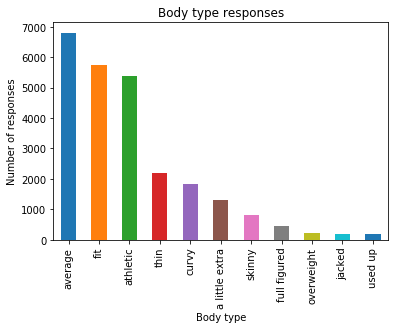

In [14]:
#generate bar chart for body type responses

body_type_responses = pd.value_counts(df['body_type'].values, sort=True)
print(body_type_responses)
ax = body_type_responses.plot(kind='bar', title='Body type responses')
ax.set(xlabel='Body type', ylabel='Number of responses')
plt.show()

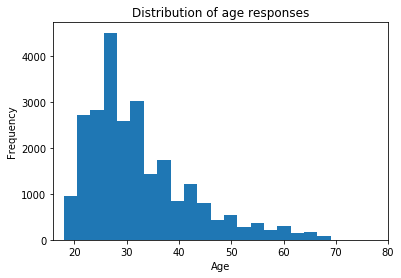

In [15]:
#generating histogram for age responses
plt.hist(df['age'], bins=20)
plt.title("Distribution of age responses")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

In [16]:
df.corr()

,age,height,diet_code,drinks_code,drugs_code,smokes_code,body_type_code
age,1.000000,-0.046986,-0.037272,-0.112828,-0.167408,-0.153620,-0.048182
height,-0.046986,1.000000,0.064890,0.035809,0.073346,0.057508,-0.041274
diet_code,-0.037272,0.064890,1.000000,0.071754,-0.058015,0.018517,-0.012690
drinks_code,-0.112828,0.035809,0.071754,1.000000,0.218737,0.142761,0.020841
drugs_code,-0.167408,0.073346,-0.058015,0.218737,1.000000,0.348970,0.084404
smokes_code,-0.153620,0.057508,0.018517,0.142761,0.348970,1.000000,0.080216
body_type_code,-0.048182,-0.041274,-0.012690,0.020841,0.084404,0.080216,1.000000


# Question 1: Is it possible to use diet,lifestyle information(drinking/smoking/drug use habits) and body type to predict age?

In [17]:
#select features and scale the data
from sklearn.preprocessing import scale
list_of_features_for_analysis = [
    'diet_code',
    'drinks_code',
    'drugs_code',
    'smokes_code',
    'body_type_code',
]
features=df[list_of_features_for_analysis]
scaled_features=scale(features,axis=0)
age=df['age']


In [18]:
#splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_features,age,test_size=0.2,random_state=25)

The model training score is 0.046201071821195816
Model test set score 0.04287092613924037


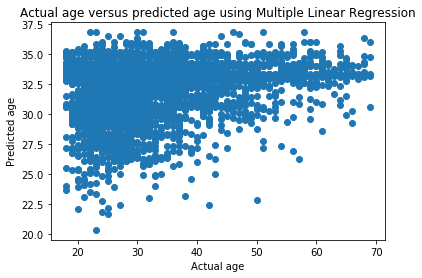

In [19]:
#using multiple linear regression model to predict age
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model_training_score=model.score(X_train,y_train)
print("The model training score is",model_training_score)

model_test_score = model.score(X_test, y_test)

print("Model test set score",model_test_score)

#generate plot showing difference between predicted age and actual age using Multiple Linear Regression model

model_predictions = model.predict(X_test)

plt.scatter(y_test, model_predictions)
plt.title("Actual age versus predicted age using Multiple Linear Regression")
plt.xlabel("Actual age")
plt.ylabel("Predicted age")
plt.show()


The model training score is 0.046201071821195816
Model test set score 0.005824780658340467


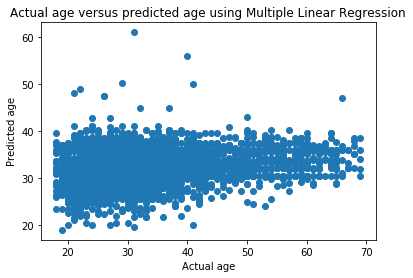

In [20]:
#using the K Neighbors Regressor model to predict age
from sklearn.neighbors import KNeighborsRegressor
kn_model=KNeighborsRegressor(n_neighbors=50,weights="distance")
kn_model.fit(X_train,y_train)
kntraining_score=model.score(X_train,y_train)
print("The model training score is",kntraining_score)

kn_test_score = kn_model.score(X_test,y_test)

print("Model test set score",kn_test_score)

#generate plot showing difference between predicted age and actual age using the K Neighbors Regressor model
kn_model_predict = kn_model.predict(X_test)

plt.scatter(y_test, kn_model_predict)
plt.title("Actual age versus predicted age using Multiple Linear Regression")
plt.xlabel("Actual age")
plt.ylabel("Predicted age")
plt.show()

# Question 2: Can we use diet, lifestyle information(drinking/drugs/smoking habits) and age to preduct body type?

In [21]:
#Selecting features and scaling data
from sklearn.preprocessing import scale

list_of_features_classification = [
    'diet_code',
    'drinks_code',
    'drugs_code',
    'smokes_code',
    'age'
]
features_classification = df[list_of_features_classification]
scaled_features_classification = scale(features_classification, axis=0)
labels = df['body_type_code']

In [22]:
# generate training and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(scaled_features_classification, labels, test_size=0.2, random_state=40)

In [23]:
#Using the KNeighborsRegressor model to predict body type
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=76)
knn_classifier.fit(train_data, train_labels)

knn_training_score = knn_classifier.score(train_data, train_labels)

print("KNN training set score: %s" %(knn_training_score))

knn_test_score = knn_classifier.score(test_data, test_labels)

print("KNN test set score: %s" %(knn_test_score))

KNN training set score: 0.28742723518583013
KNN test set score: 0.2754228855721393


In [24]:
# generate classification report and confusion matrix for K Nearest Neighbors classifier

from sklearn.metrics import classification_report, confusion_matrix 

knn_predictions = knn_classifier.predict(test_data)
print(confusion_matrix(test_labels, knn_predictions))
print(classification_report(test_labels, knn_predictions))

[[726 339 278   0   0   0   0   0   0   0   0]
 [482 371 286   0   0   0   0   0   0   0   0]
 [475 311 287   0   0   0   0   0   0   0   0]
 [242 121 104   0   0   0   0   0   0   0   0]
 [188 105  79   0   0   0   0   0   0   0   0]
 [147  58  56   0   0   0   0   0   0   0   0]
 [107  30  36   0   0   0   0   0   0   0   0]
 [ 32  21  27   0   0   0   0   0   0   0   0]
 [ 23  13   6   0   0   0   0   0   0   0   0]
 [ 24   9   6   0   0   0   0   0   0   0   0]
 [ 26   5   4   1   0   0   0   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.29      0.54      0.38      1343
          1       0.27      0.33      0.29      1139
          2       0.25      0.27      0.26      1073
          3       0.00      0.00      0.00       467
          4       0.00      0.00      0.00       372
          5       0.00      0.00      0.00       261
          6       0.00      0.00      0.00       173
          7       0.00      0.00      0.00        80
    

C:\Users\Gayathri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


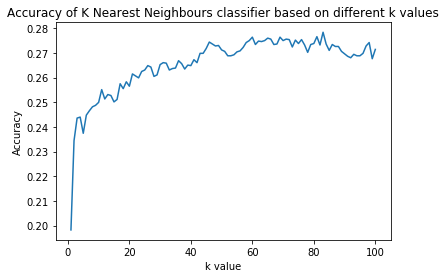

{'k': 83, 'score': 0.278407960199005}


In [25]:
# generate plot showing K Nearest Neighbors classifier score based on different n_neighbors values 
# and print out n_neighbors value that results in highest score

scores = []

highest_score = {
    'k': 0,
    'score': 0
}

for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    score = classifier.score(test_data, test_labels)
    scores.append(score)
    if score > highest_score['score']:
        highest_score = {
            'k': k,
            'score': score
        }

x_values = range(1, 101)

y_values = scores

plt.plot(x_values, y_values)
plt.title('Accuracy of K Nearest Neighbours classifier based on different k values')
plt.ylabel('Accuracy')
plt.xlabel('k value')
plt.show()
print(highest_score)

In [26]:
#Using support vector machines classifier to predict body type
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',gamma=10)
classifier.fit(train_data,train_labels)
svc_training_score=classifier.score(train_data,train_labels)
print("Training score:",svc_training_score)
svc_test_score=classifier.score(test_data,test_labels)
print("Test score:",svc_test_score)

Training score: 0.3185233096173939
Test score: 0.2650746268656716


In [ ]:
# generate classification report and confusion matrix for Support Vector Machines classifier
from sklearn.metrics import classification_report, confusion_matrix 

svc_predictions = classifier.predict(test_data)
print(confusion_matrix(test_labels, svc_predictions))
print(classification_report(test_labels, svc_predictions))

[[753 318 262   4   1   1   1   1   0   0   2]
 [556 301 275   3   1   2   0   0   0   0   1]
 [528 271 270   2   0   0   0   0   0   0   2]
 [244 125  92   3   0   0   1   0   0   0   2]
 [210  84  75   2   0   0   1   0   0   0   0]
 [157  52  47   3   0   2   0   0   0   0   0]
 [113  23  32   2   2   0   1   0   0   0   0]
 [ 44  20  16   0   0   0   0   0   0   0   0]
 [ 23  13   5   0   0   0   0   0   1   0   0]
 [ 24   7   7   0   0   0   0   0   0   0   1]
 [ 27   5   3   0   0   0   0   0   0   0   1]]
             precision    recall  f1-score   support

          0       0.28      0.56      0.37      1343
          1       0.25      0.26      0.26      1139
          2       0.25      0.25      0.25      1073
          3       0.16      0.01      0.01       467
          4       0.00      0.00      0.00       372
          5       0.40      0.01      0.02       261
          6       0.25      0.01      0.01       173
          7       0.00      0.00      0.00        80
    

C:\Users\Gayathri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# generate plot showing SVC Classifier score based on different gamma values 
# and print out gamma value that results in highest score
import numpy as np
scores = []

highest_score = {
    'gamma': 0,
    'score': 0
}

gamma_values = np.arange(0.1, 1.0, 0.1)

for val in gamma_values:
    svc_classifier = SVC(kernel='rbf', gamma=val)
    svc_classifier.fit(train_data, train_labels)
    score = svc_classifier.score(test_data, test_labels)
    scores.append(score)
    if score > highest_score['score']:
        highest_score = {
            'gamma': val,
            'score': score
        }

x_values = gamma_values

y_values = scores

plt.plot(x_values, y_values)
plt.title('Accuracy of Support Vector Machines classifier based on different gamma values')
plt.ylabel('Accuracy')
plt.xlabel('Gamma value')
plt.show()
print(highest_score)